In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS

# OLS

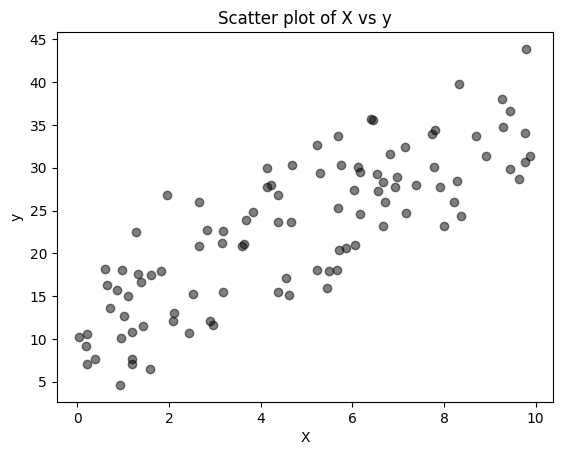

In [2]:
# Create a dataset for single variable linear regression
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 random numbers between 0 and 10
y = 10.0 + 2.5 * X.flatten() + np.random.randn(100) * 5  # Linear relationship with some noise

# Visualize the data
fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.5, color="black")
ax.set(
    xlabel='X',
    ylabel='y',
    title='Scatter plot of X vs y'
)
plt.show()

## Statsmodels

In [3]:
# prepend a column of ones to X for the intercept term
X_ = add_constant(X)

# Fit the OLS model
# Note: hasconst is required for the intercept term.
model_1 = OLS(endog=y, exog=X_, hasconst=True).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 01 Mar 2026   Prob (F-statistic):           2.09e-25
Time:                        08:40:13   Log-Likelihood:                -302.46
No. Observations:                 100   AIC:                             608.9
Df Residuals:                      98   BIC:                             614.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1108      0.966     11.496      0.0

In [4]:
print(f"{'t-statistic for beta_1':>35}: {model_1.tvalues[1]:.3f}")
print(f"{'p-value for beta_1':>35}: {model_1.pvalues[1]:.3f}")
print(f"{'95% confidence interval for beta_1':>35}: [{model_1.conf_int()[1][0]:.3f}, {model_1.conf_int()[1][1]:.3f}]")
print(f"{'R-squared for the model':>35}: {model_1.rsquared:.3f}")
print(f"{'F-statistic for the overall model':>35}: {model_1.fvalue:.3f}")
print(f"{'p-value for the overall model':>35}: {model_1.f_pvalue:.3f}")

             t-statistic for beta_1: 14.144
                 p-value for beta_1: 0.000
 95% confidence interval for beta_1: [2.122, 2.815]
            R-squared for the model: 0.671
  F-statistic for the overall model: 200.047
      p-value for the overall model: 0.000


In [5]:
# Plot the regression line
def plot_regression_line(X, y, beta_0, beta_1):
    fig, ax = plt.subplots()
    ax.scatter(X, y, alpha=0.5, color="black", label='Data')
    
    # Create a line of predicted values
    X_line = np.linspace(X.min(), X.max(), 100)
    y_line = beta_0 + beta_1 * X_line

    ax.plot(X_line, y_line, color='red', label='OLS Regression Line')
    ax.set(
        xlabel='X',
        ylabel='y',
        title='Scatter plot of X vs y with OLS regression line'
    )
    ax.legend()
    plt.show()

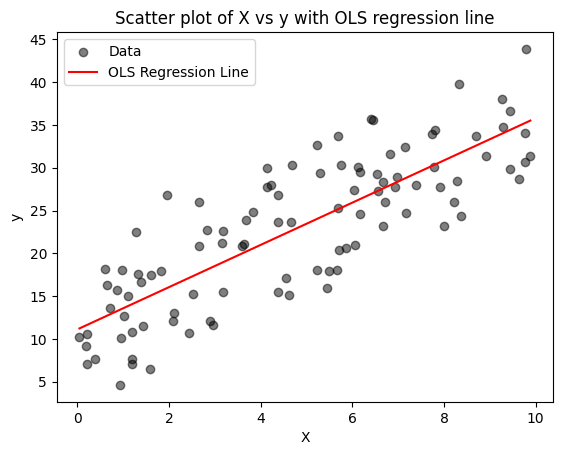

In [6]:
beta_0, beta_1 = model_1.params
plot_regression_line(X, y, beta_0, beta_1)

## Manual

In [7]:
# manually compute the coefficients using the OLS formula. Don't use the matrix form.
x_xbar = X.flatten() - X.mean()
y_ybar = y - y.mean()

beta_1 = np.sum(x_xbar * y_ybar) / np.sum(x_xbar ** 2)
beta_0 = y.mean() - beta_1 * X.mean()

print(f"Manually computed coefficients: beta_0 = {beta_0:.4f}, beta_1 = {beta_1:.4f}")

Manually computed coefficients: beta_0 = 11.1108, beta_1 = 2.4685


In [8]:
# Statistical significance of the coefficients

# * T-statistic
y_pred = beta_0 + beta_1 * X.flatten()  # predictions
ssr = np.sum((y_pred - y.mean()) ** 2)  # sum of squares due to regression
sse = np.sum((y - y_pred) ** 2)  # sum of squared errors
sst = ssr + sse  # total sum of squares
dof = len(X) - 2  # degrees of freedom
s = np.sqrt(sse / dof)  # unbiased estimator of variance

se_beta_1 = s / np.sqrt(np.sum(x_xbar ** 2))
t_stat_beta_1 = beta_1 / se_beta_1
print(f"{'t-statistic for beta_1':>35}: {t_stat_beta_1:.3f}")

# * P-value for beta_1
p_value_beta_1 = 2 * (1 - t.cdf(np.abs(t_stat_beta_1), df=len(X) - 2))
print(f"{'p-value for beta_1':>35}: {p_value_beta_1:.3f}")

# * Confience interval for beta_1
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=dof)
ci_lower = beta_1 - t_critical * se_beta_1
ci_upper = beta_1 + t_critical * se_beta_1
print(f"{'95% confidence interval for beta_1':>35}: [{ci_lower:.3f}, {ci_upper:.3f}]")

# * R-squared for the model
r_squared = ssr / sst
print(f"{'R-squared for the model':>35}: {r_squared:.3f}")

# * F-statistic for the overall model
msr = ssr / 1 # division by the number of predictors (excluding the intercept)
mse = sse / dof
f_statistic = msr / mse  # (SSM/df_model) / (SSR/df_residual)
p_value_f = 1 - t.cdf(f_statistic, df=len(X) - 2)
print(f"{'F-statistic for the overall model':>35}: {f_statistic:.3f}")
print(f"{'p-value for the overall model':>35}: {p_value_f:.3f}")

             t-statistic for beta_1: 14.144
                 p-value for beta_1: 0.000
 95% confidence interval for beta_1: [2.122, 2.815]
            R-squared for the model: 0.671
  F-statistic for the overall model: 200.047
      p-value for the overall model: 0.000


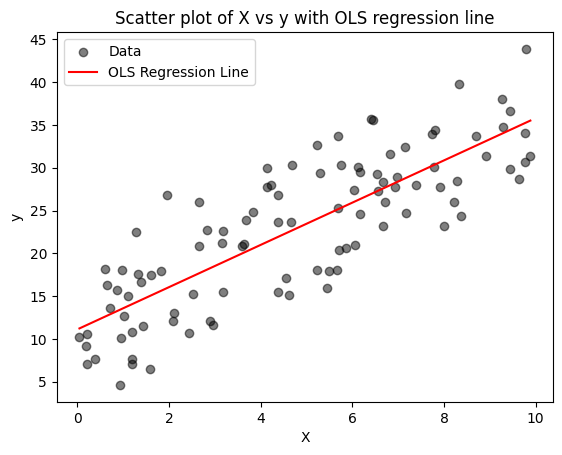

In [9]:
plot_regression_line(X, y, beta_0, beta_1)

# Good fit does not imply correct model
Being able to reject the null hypothesis (slope = 0) does not mean your model is the best fit for the data.

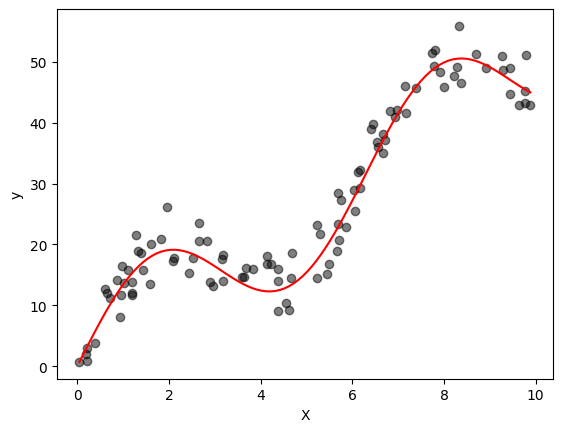

In [10]:
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 random numbers between 0 and 10
f = lambda x: 5 * x + 10 * np.sin(x)  # Non-linear relationship
y = f(X.flatten()) + 3 * np.random.randn(100) # Sinusoidal

# Plot the regression line
fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.5, color="black", label='Data')
# Plot the line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = f(X_line.flatten())
ax.plot(X_line, y_line, color='red', label='True Relationship')
ax.set(
    xlabel='X',
    ylabel='y',
)
plt.show()

In [11]:
# Fit a linear regression model using OLS
X_ = add_constant(X)
model_3 = OLS(endog=y, exog=X_, hasconst=True).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     352.8
Date:                Sun, 01 Mar 2026   Prob (F-statistic):           3.03e-34
Time:                        08:40:13   Log-Likelihood:                -334.68
No. Observations:                 100   AIC:                             673.4
Df Residuals:                      98   BIC:                             678.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6093      1.334      3.456      0.0

- Notice that we can safely reject the null hypothesis that x1 = 0.
- However, this does not imply a linear relationship between X and y.

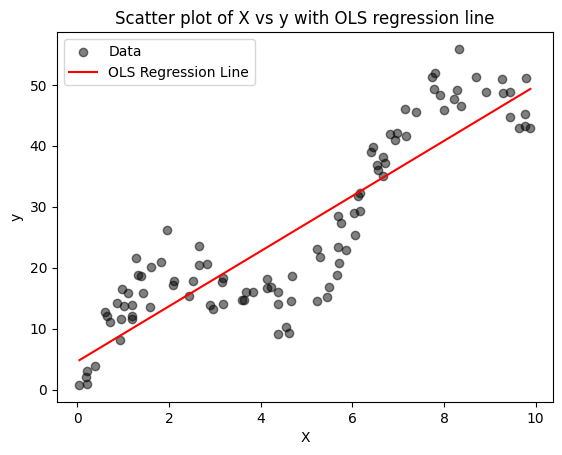

In [12]:
beta_0, beta_1 = model_3.params
plot_regression_line(X, y, beta_0, beta_1)

# Fail to reject null hypothesis
Failing to reject the null hypothesis (slope = 0) does not mean there x and y are independent.

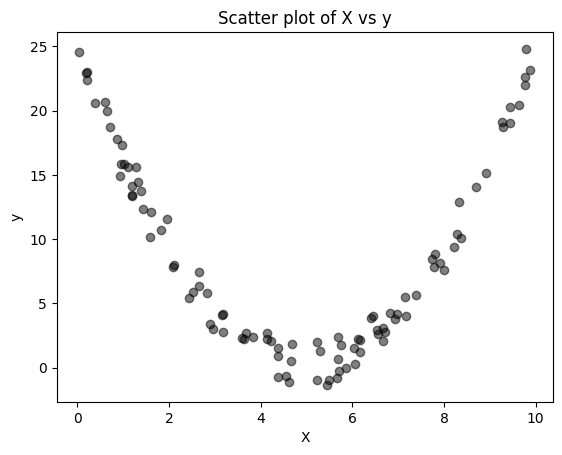

In [13]:
# Create a dataset for single variable linear regression
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 random numbers between 0 and 10
f = lambda x: (x - 5) ** 2
y =  f(X.flatten()) + np.random.randn(100)  # Non-linear relationship with some noise

# Visualize the data
fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.5, color="black")
ax.set(
    xlabel='X',
    ylabel='y',
    title='Scatter plot of X vs y'
)
plt.show()

In [14]:
# Fit a linear regression model using OLS
X_ = add_constant(X)
model_4 = OLS(endog=y, exog=X_, hasconst=True).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.783
Date:                Sun, 01 Mar 2026   Prob (F-statistic):              0.185
Time:                        08:40:13   Log-Likelihood:                -343.77
No. Observations:                 100   AIC:                             691.5
Df Residuals:                      98   BIC:                             696.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2438      1.461      7.012      0.0

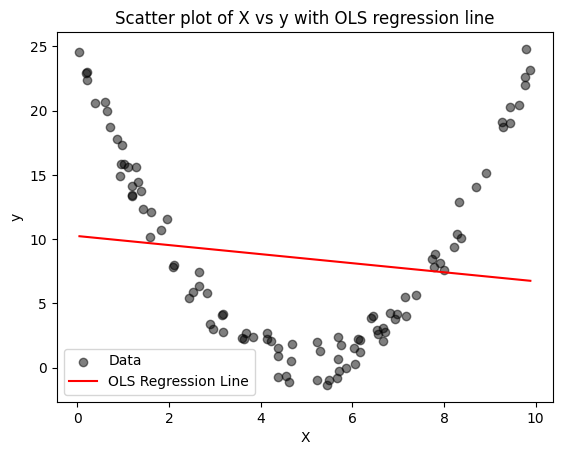

In [15]:
beta_0, beta_1 = model_4.params
plot_regression_line(X, y, beta_0, beta_1)

- Notice that we fail to reject the null hypothesis for x1, and the R-squared is very low.
- However, this does not mean that there is no relationship between X and y.
- It just means that a linear model is not appropriate for this data.
- The good news is that we can use OLS on non-linear data with some feature engineering.

In [16]:
# add a quadratic term to the model
X_quad = np.hstack([X, X**2])
X_quad_ = add_constant(X_quad)
model_quad = OLS(endog=y, exog=X_quad_, hasconst=True).fit()
print(model_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2827.
Date:                Sun, 01 Mar 2026   Prob (F-statistic):           1.03e-86
Time:                        08:40:14   Log-Likelihood:                -140.55
No. Observations:                 100   AIC:                             287.1
Df Residuals:                      97   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9514      0.276     90.510      0.0

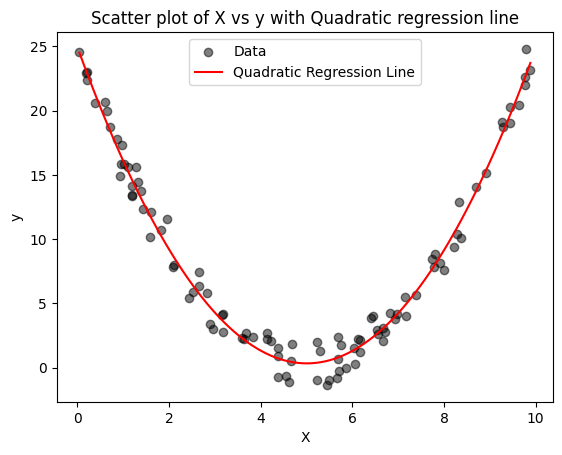

In [17]:
# plot the quadratic regression line
beta_0, beta_1, beta_2 = model_quad.params

fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.5, color="black", label='Data')
X_line = np.linspace(X.min(), X.max(), 100)
y_line = beta_0 + beta_1 * X_line + beta_2 * X_line**2
ax.plot(X_line, y_line, color='red', label='Quadratic Regression Line')
ax.set(
    xlabel='X',
    ylabel='y',
    title='Scatter plot of X vs y with Quadratic regression line'
)
ax.legend()
plt.show()